Mohammad Matin Momeni --------- 400243072
Mohammad Sobhan Saririan --------- 400243049

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
from scipy.fft import rfft, rfftfreq , irfft
from scipy.io import wavfile
from scipy.io.wavfile import write

In [101]:
rate, data = wavfile.read('project-files/noisy_tlou.wav')
Amplitude = rfft(data)
Frequency = rfftfreq(len(data), 1 / rate)

In [107]:
def plot_signal(data , Frequency ,Amplitude , Title , x_label , y_label):
    
    plt.figure(figsize=(20, 10))
    plt.style.use('cyberpunk')
    plt.subplot(1, 2, 1)
    plt.plot(data , color='Green')
    plt.title('Data' , color='Green' , fontsize=20)
    mplcyberpunk.make_lines_glow()

    plt.style.use('cyberpunk')
    plt.subplot(1, 2, 2)
    plt.plot(Frequency, np.abs(Amplitude) , color='cyan')
    plt.ylabel('Amplitude' , color='cyan' , fontsize=16)
    plt.xlabel('Frequency [Hz]' , color='cyan' , fontsize=16)  
    plt.title(Title , color='cyan' , fontsize=16)
    mplcyberpunk.make_lines_glow()
    plt.show()

def plot_spectogram(data , rate):
    plt.figure(figsize=(20, 10))
    powerSpectrum , freqenciesFound , time , imageAxis = plt.specgram(data, Fs=rate,cmap='magma_r' )
    plt.colorbar()
    plt.xlabel('Time', color='cyan' , fontsize=16)
    plt.ylabel('Frequency', color='cyan' , fontsize=16)
    plt.title('Spectrogram of Noisy TLOU' , color='cyan' , fontsize=16)
    plt.show()

def Remove_Noise(Frequency , Amplitude , rate) :
    Remove_Noise_Filter = np.ones(len(Amplitude))
    points_per_freq = len(Frequency) / (rate / 2)
    target_idx = int(points_per_freq*4000)
    Remove_Noise_Filter[target_idx-550 : target_idx +550] = 0
    target_idx = int(points_per_freq*10000)
    Remove_Noise_Filter[target_idx-550 : target_idx +550] = 0
    target_idx = int(points_per_freq*16000)
    Remove_Noise_Filter[target_idx-550 : target_idx +550] = 0
    return Remove_Noise_Filter

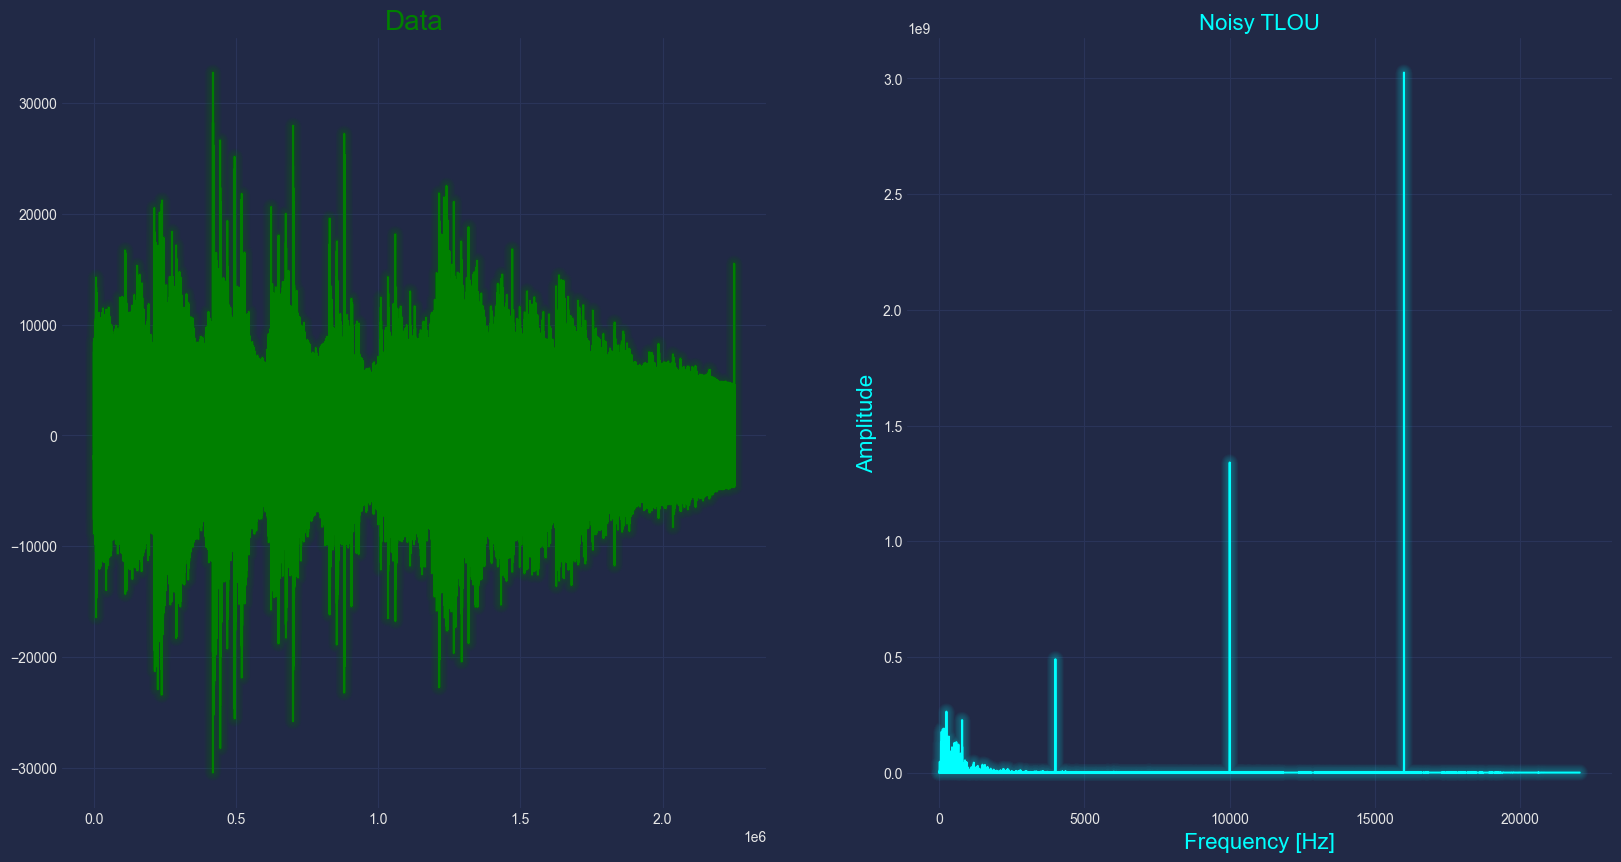

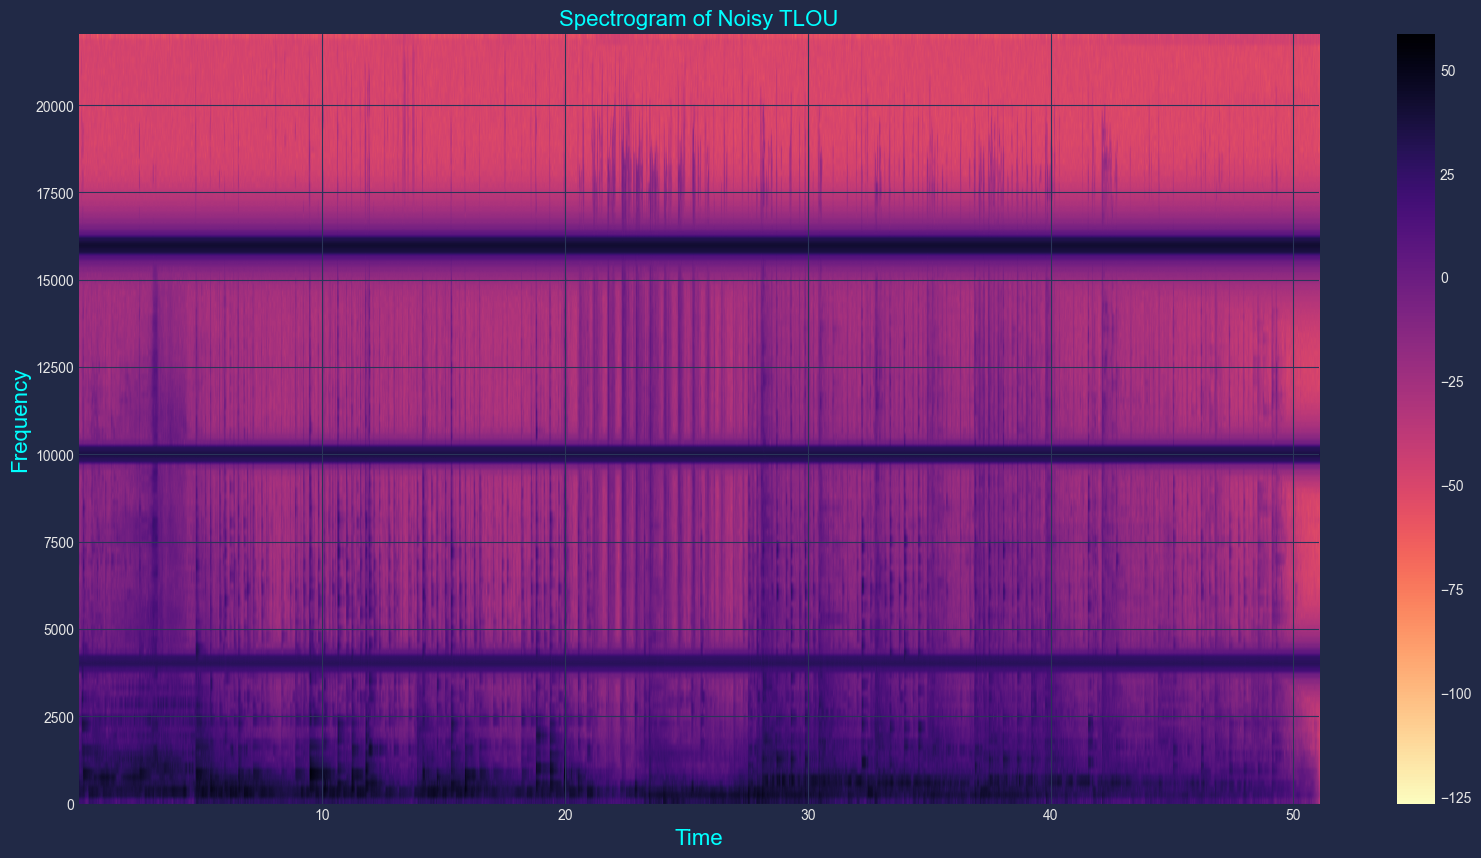

In [108]:
from scipy.io import wavfile
rate, data = wavfile.read('project-files/noisy_tlou.wav')

Amplitude = rfft(data)
Frequency = rfftfreq(len(data), 1 / rate)

plot_signal(data , Frequency , Amplitude , 'Noisy TLOU' , 'Time' , 'Amplitude')
plot_spectogram(data , rate)


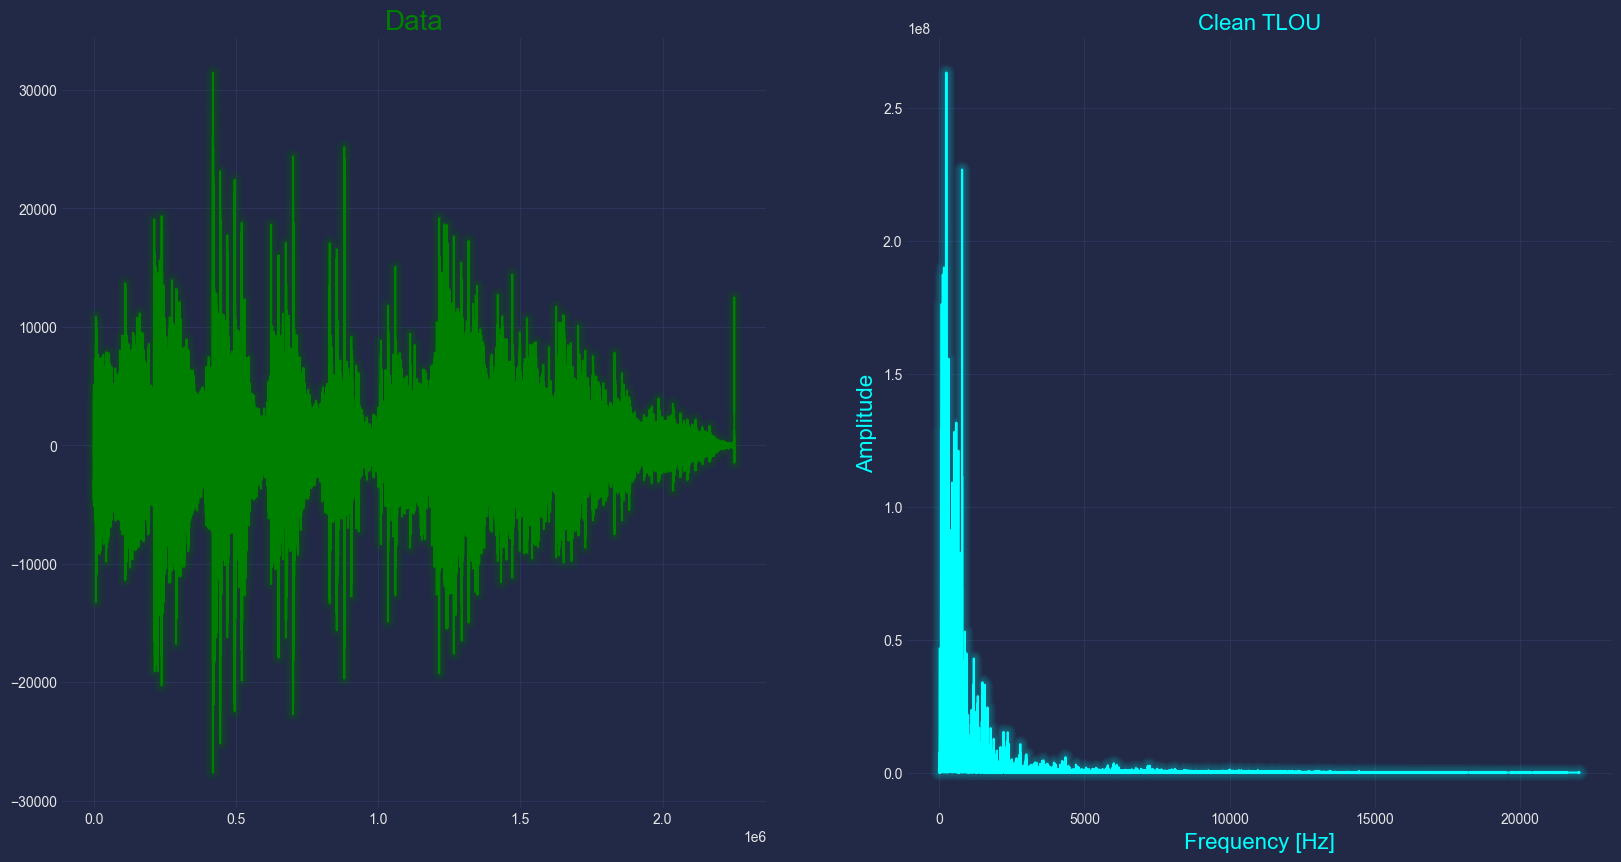

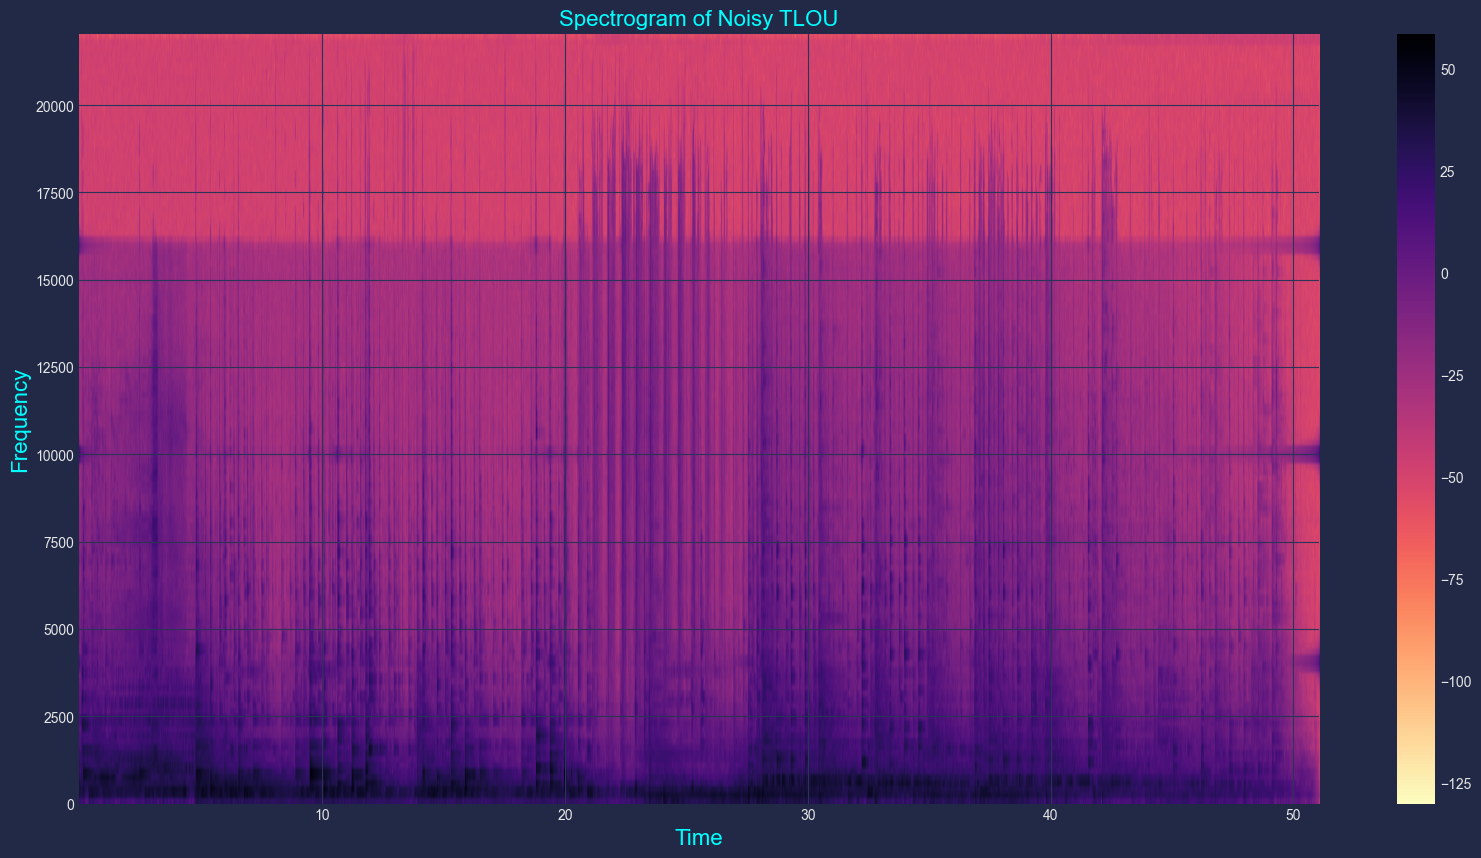

In [109]:
Remove_Noise_Filter = Remove_Noise(Frequency , Amplitude , rate)

Amplitude = Amplitude * Remove_Noise_Filter
data = irfft(Amplitude)

plot_signal(data , Frequency , Amplitude , 'Clean TLOU' , 'Time' , 'Amplitude')
plot_spectogram(data , rate)

write('project-files/clean.wav', rate, data.astype(np.int16))



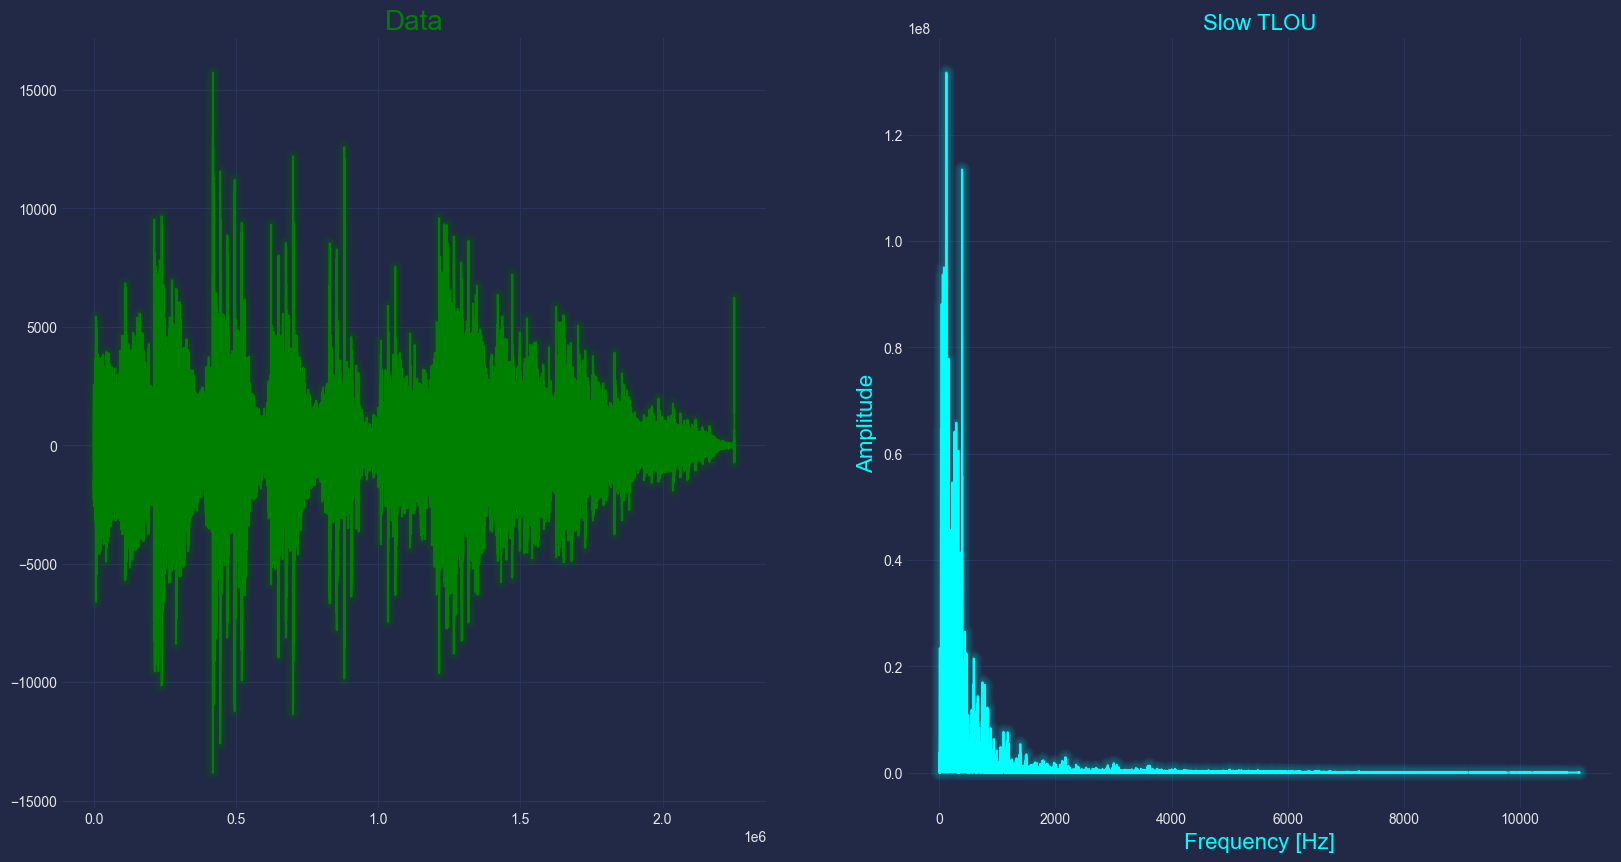

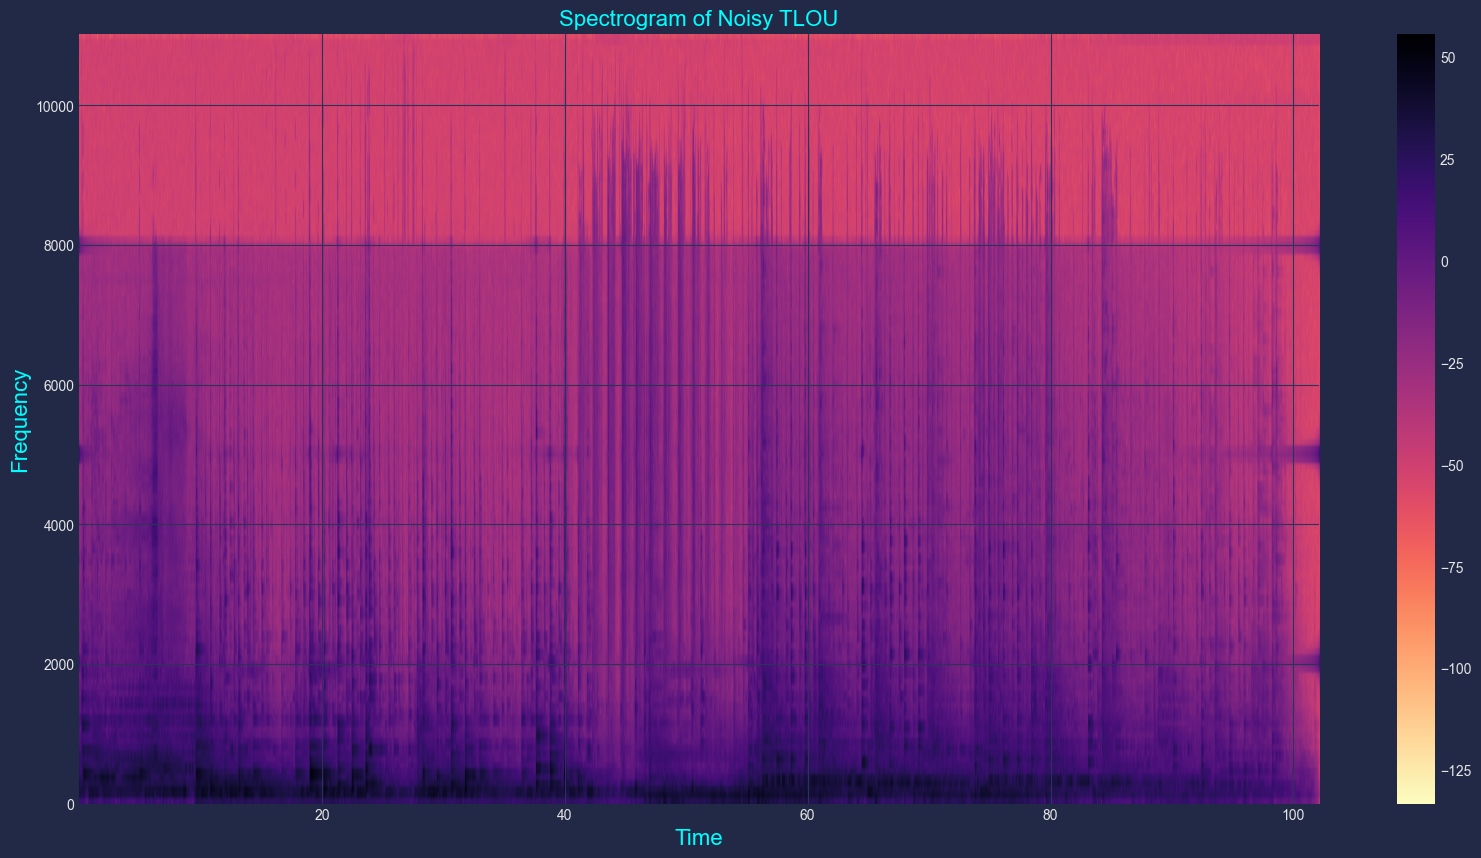

In [114]:
Remove_Noise_Filter = Remove_Noise(Frequency , Amplitude , rate)

Amplitude = Amplitude * Remove_Noise_Filter
Amplitude *= 0.5
data = irfft(Amplitude)
Frequency = rfftfreq(len(data), 2 / rate)

plot_signal(data , Frequency , Amplitude , 'Slow TLOU' , 'Time' , 'Amplitude')
plot_spectogram(data , rate//2)


write('project-files/slow.wav', rate//2, data.astype(np.int16))



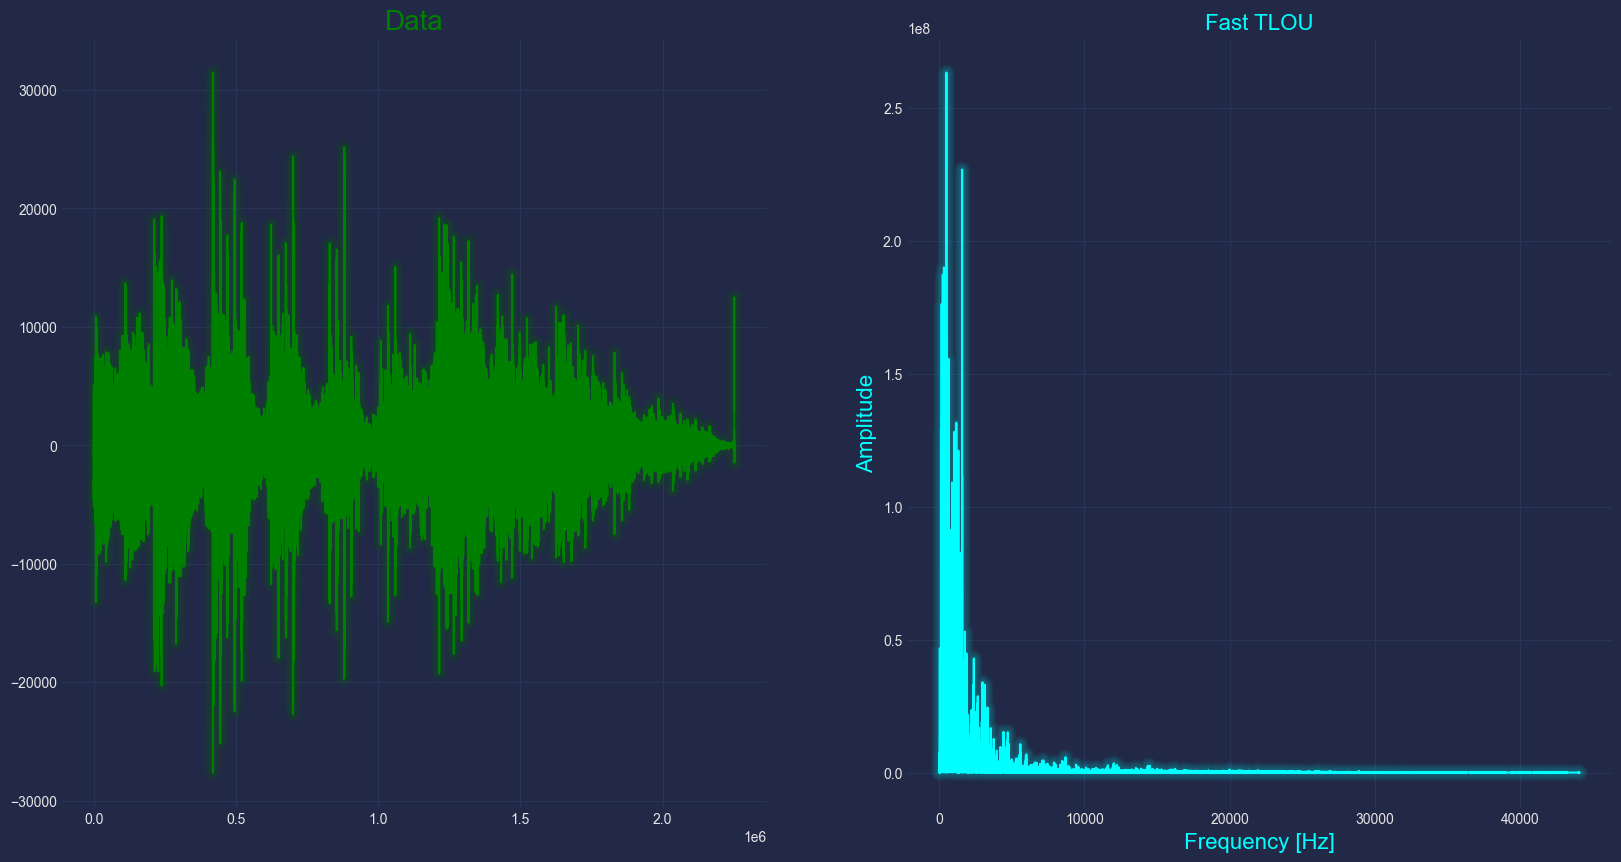

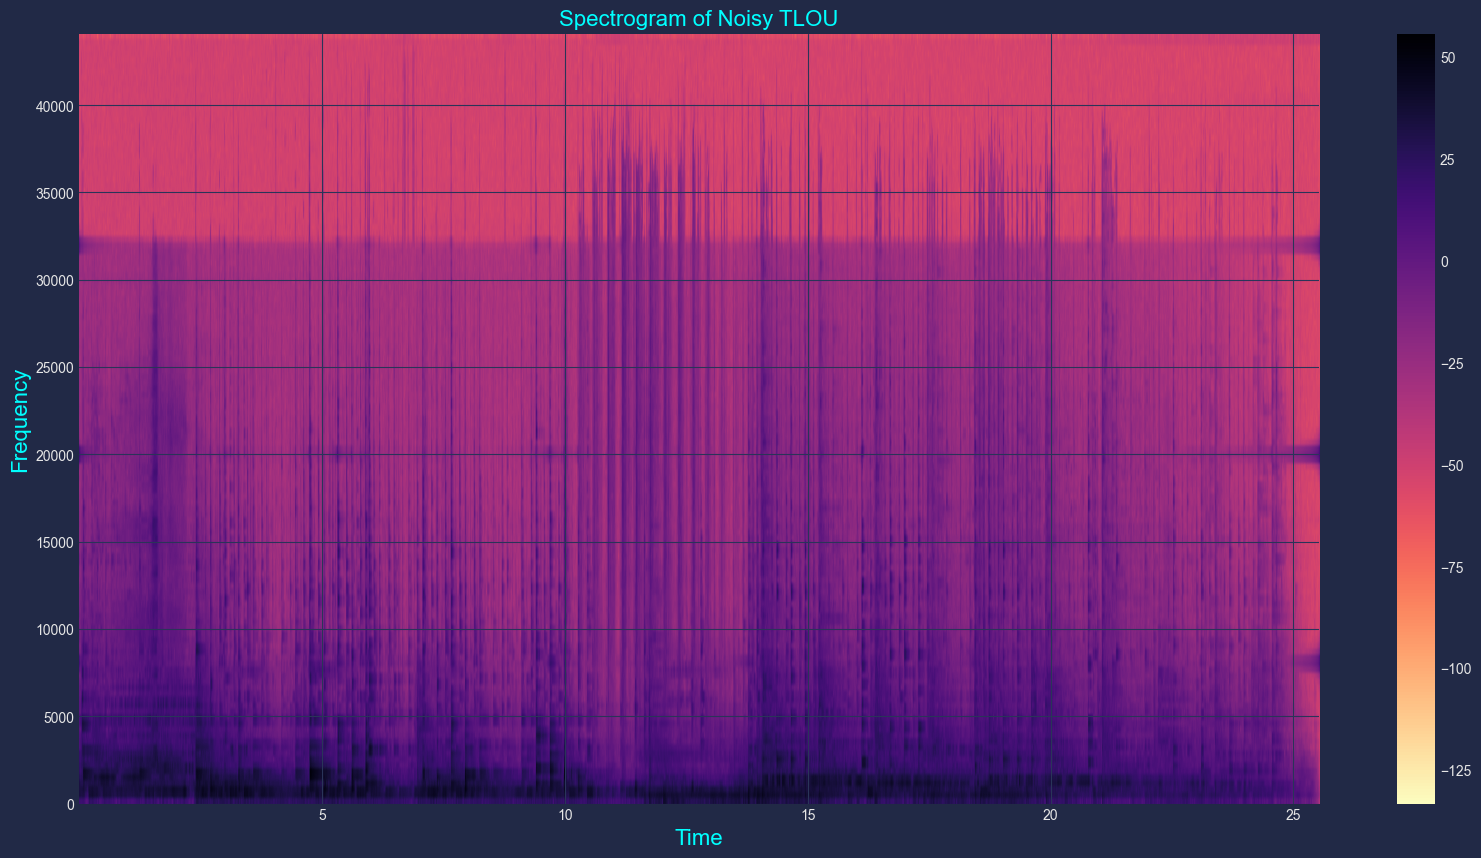

In [115]:
Remove_Noise_Filter = Remove_Noise(Frequency , Amplitude , rate)

Amplitude = Amplitude * Remove_Noise_Filter
Amplitude *= 2
data = irfft(Amplitude)
Frequency = rfftfreq(len(data), 1 / (2*rate))

plot_signal(data , Frequency , Amplitude , 'Fast TLOU' , 'Time' , 'Amplitude')
plot_spectogram(data , rate*2)

write('project-files/fast.wav', rate*2, data.astype(np.int16))